In [1]:
%matplotlib inline

import codecs
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from scapy.all import *
import packet
import struct

from tikzplotlib import get_tikz_code

SHOW = False # disable for generating LaTeX output
FIGURE_WIDTH = '8.5cm'
FIGURE_HEIGHT = '4cm'

In [2]:
tikz_header = r"""
\documentclass[multi=true,preview,tikz]{standalone}

\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usepackage{pgfplots}
\pgfplotsset{compat=1.13}

\begin{document}%

\pgfplotsset{every axis/.append style={
    label style={font=\footnotesize},
    tick label style={font=\scriptsize},
    legend style={font=\scriptsize},
}}
\pgfplotsset{every mark/.append style={
    mark size=5pt,
}}
"""

tikz_footer = r"""
\end{document}
"""

In [3]:
measurement_folder = Path('../measurements/platform-a-wireless')
plot_folder = Path('.')
plot_folder.mkdir(parents=True, exist_ok=True)

files = list(measurement_folder.glob('**/*'))
counters = list(measurement_folder.glob('**/*counters*'))
loggers = list(measurement_folder.glob('**/*logger*'))
pcaps = list(measurement_folder.glob('**/*.pcap'))

print('Files:', loggers)

Files: [PosixPath('../measurements/platform-a-wireless/20181009_223401_tsstx_k_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_tsr_k_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_tastx_k_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_motor_position_right_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_motor_position_left_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_taw_k_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_tssrx_k_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_controller_processing_delay_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_motor_voltage_applied_left_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_gyro_offset_logger.csv'), PosixPath('../measurements/platform-a-wireless/20181009_223401_robot_roundtrip

# Counter evaluation

In [4]:
dfthr = []

for counter in counters: 
    df = pd.read_csv(counter, sep = ';', quotechar="'")
    # do not set as index (cannot be shifted)
    #df = df.set_index('timestamp')
    dfthr.append(df)
    
print(df.head())

# extract first (lowest) timestamp
begin_timestamp = df.timestamp.iloc[0]

# extract plot data
y_reord = df.controller_reord.values
y_lost = df.controller_lost.values
y_rx = df.controller_rx.values
y_tx = df.controller_tx.values
x = df.timestamp - begin_timestamp
x = x / 1000

   timestamp  controller_reord  controller_lost  controller_rx  controller_tx
0    1639195                 0                0             28              0
1    1640195                 0                0             60              0
2    1641195                 0                0             92              0
3    1642195                 0                0            124              0
4    1643195                 0                0            156              0


platform-a-wireless-counters.tex


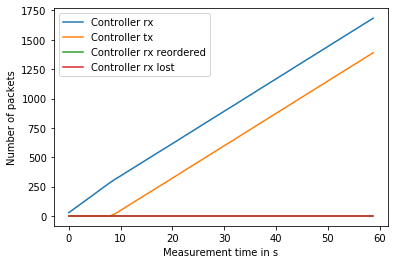

In [5]:
plt.plot(x, y_rx, label='Controller rx')
plt.plot(x, y_tx, label='Controller tx')
plt.plot(x, y_reord, label='Controller rx reordered')
plt.plot(x, y_lost, label='Controller rx lost')

plt.legend()

plt.ylabel('Number of packets')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-counters.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)


# Logger evaluation

In [6]:
for logger in loggers: 
    df = pd.read_csv(logger, sep = ';', quotechar="'")
    if 'gyro_rate' in str(logger):
        gyro_rate = df
    elif 'gyro_offset' in str(logger):
        gyro_offset = df
    elif 'motor_position_left' in str(logger):
        motor_position_left = df
    elif 'motor_position_right' in str(logger):
        motor_position_right = df
    elif 'motor_voltage_applied_left' in str(logger):
        motor_voltage_applied_left = df
    elif 'motor_voltage_applied_right' in str(logger):
        motor_voltage_applied_right = df
        #print('motor_voltage_applied_right')
        #print(df.head())
    elif 'tsr_k' in str(logger):
        tsr_k = df
        #print('tsr_k')
        #print(df.head())
    elif 'tsstx_k' in str(logger):
        tsstx_k = df
        #print('tsstx_k')
        #print(df.head())
    elif 'tssrx_k' in str(logger):
        tssrx_k = df
    elif 'tastx_k' in str(logger):
        tastx_k = df
    elif 'tasrx_k' in str(logger):
        tasrx_k = df
        #print('tasrx_k')
        #print(df.head())
    elif 'taw_k' in str(logger):
        taw_k = df
        #print('taw_k')
        #print(df.head())

# extract plot data
y_gyro_rate = gyro_rate.value.values
begin_timestamp = gyro_rate.timestamp.iloc[0]
x_gyro_rate = gyro_rate.timestamp - begin_timestamp

y_gyro_offset = gyro_offset.value.values
begin_timestamp = gyro_offset.timestamp.iloc[0]
x_gyro_offset = gyro_offset.timestamp - begin_timestamp

y_motor_position_left = motor_position_left.value.values
begin_timestamp = motor_position_left.timestamp.iloc[0]
x_motor_position_left = motor_position_left.timestamp - begin_timestamp

y_motor_position_right = motor_position_right.value.values
begin_timestamp = motor_position_right.timestamp.iloc[0]
x_motor_position_right = motor_position_right.timestamp - begin_timestamp

y_motor_voltage_applied_left = motor_voltage_applied_left.value.values
begin_timestamp = motor_voltage_applied_left.timestamp.iloc[0]
x_motor_voltage_applied_left = motor_voltage_applied_left.timestamp - begin_timestamp

y_motor_voltage_applied_right = motor_voltage_applied_right.value.values
begin_timestamp = motor_voltage_applied_right.timestamp.iloc[0]
x_motor_voltage_applied_right = motor_voltage_applied_right.timestamp - begin_timestamp

# robot's delay measurements
begin_timestamp = tsr_k.timestamp.iloc[0]

y_tsr_k_logger = (tsr_k.value.values - begin_timestamp) * 1000 # convert to ms
x_tsr_k_logger = tsr_k.timestamp - begin_timestamp

y_tsstx_k_logger = (tsstx_k.value.values - begin_timestamp) * 1000 # convert to ms
x_tsstx_k_logger = tsstx_k.timestamp - begin_timestamp

y_tasrx_k_logger = (tasrx_k.value.values - begin_timestamp) * 1000 # convert to ms
x_tasrx_k_logger = tasrx_k.timestamp - begin_timestamp

y_taw_k_logger = (taw_k.value.values - begin_timestamp) * 1000 # convert to ms
x_taw_k_logger = taw_k.timestamp - begin_timestamp

# controller's delay measurements
controller_begin_timestamp = tssrx_k.timestamp.iloc[0]

y_tssrx_k_logger = (tssrx_k.value.values - controller_begin_timestamp) * 1000 # convert to ms
x_tssrx_k_logger = tssrx_k.timestamp - controller_begin_timestamp

y_tastx_k_logger = (tastx_k.value.values - controller_begin_timestamp) * 1000 # convert to ms
x_tastx_k_logger = tastx_k.timestamp - controller_begin_timestamp

## Gyro values

platform-a-wireless-gyro.tex


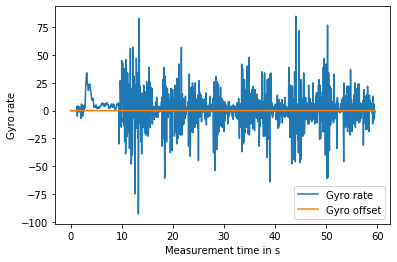

In [7]:
plt.plot(x_gyro_rate, y_gyro_rate, label='Gyro rate')
plt.plot(x_gyro_offset, y_gyro_offset, label='Gyro offset')


plt.legend()

plt.ylabel('Gyro rate')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem +  '-gyro.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

## Motor position

platform-a-wireless-motorpos.tex


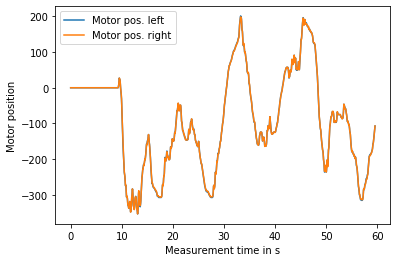

In [8]:
plt.plot(x_motor_position_left, y_motor_position_left, label='Motor pos. left')
plt.plot(x_motor_position_right, y_motor_position_right, label='Motor pos. right')

plt.legend()

plt.ylabel('Motor position')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem +  '-motorpos.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

## Motor voltage

platform-a-wireless-motorvolt.tex


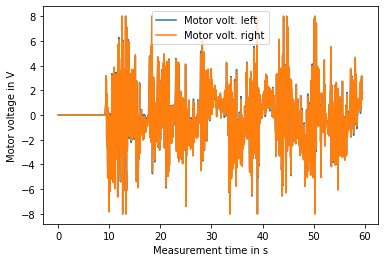

In [9]:
plt.plot(x_motor_voltage_applied_left, y_motor_voltage_applied_left, label='Motor volt. left')
plt.plot(x_motor_voltage_applied_right, y_motor_voltage_applied_right, label='Motor volt. right')

plt.legend()

plt.ylabel('Motor voltage in V')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-motorvolt.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

## Calculation of measurement start time

In [10]:
controller_start_time = 0

for i in range(0, len(x_motor_voltage_applied_left)):
    if not (y_motor_voltage_applied_left[i] == 0):
        controller_start_time = x_motor_voltage_applied_left[i]
        print("Controller kicked in at: " + str(controller_start_time) + "s.")
        break
    

Controller kicked in at: 9.1972603910001s.


## Cumulative delay measurements (from the robot's perspective)

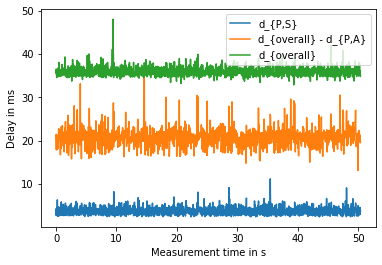

In [11]:
dps_k = np.subtract(y_tsstx_k_logger, y_tsr_k_logger)
up_to_dparx_k = np.subtract(y_tasrx_k_logger, y_tsr_k_logger)
up_to_dpa_k = np.subtract(y_taw_k_logger, y_tsr_k_logger)

plt.plot(x_tsr_k_logger, dps_k, label='d_{P,S}')
plt.plot(x_tsr_k_logger, up_to_dparx_k, label='d_{overall} - d_{P,A}')
plt.plot(x_tsr_k_logger, up_to_dpa_k, label='d_{overall}')

plt.legend()
plt.ylabel('Delay in ms')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-network-delays.tex')
with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

## PCAP analysis

In [12]:
import packet

r2c = []
c2r = []
timestamps = []
processing_latencies = []
processing_latencies_timestamps = []

first = True

for pcap in pcaps:
    packets = rdpcap(str(pcap))
    for pkt in packets:
        if "UDP" in pkt and pkt.sport == 34543:
            timestamps.append(pkt.time)
            
            pkt_pay_sz = len(pkt[Raw].load)
            
            if pkt.dport == 34544 and pkt_pay_sz == packet.H2R_PACKET_SIZE:
                # controller -> robot msgs
                processing_latencies.append((pkt.time - r2c[-1][0].time) * 1000.0)
                processing_latencies_timestamps.append(r2c[-1][0].time - first_timestamp)
                c2r.append([pkt])
                if ((pkt.time - r2c[-1][0].time) * 1000.0) > 4:
                    print("High delay")
                    print(pkt.time, pkt.summary())
            elif pkt_pay_sz == packet.R2H_PACKET_SIZE:
                # robot -> controller msgs
                if first:
                    first_timestamp = pkt.time
                    first = False
                r2c.append([pkt])

## Cumulative Delay (from the controller's perspective)

In [13]:
shift_to_0_timestamp = processing_latencies_timestamps[0]
processing_latencies_timestamps = np.asarray(processing_latencies_timestamps) - shift_to_0_timestamp
plt.plot(processing_latencies_timestamps, processing_latencies, label='d_{P,SRX} + d_{P,C} + d_{P,ATX}')

dpc_k = np.subtract(y_tastx_k_logger, y_tssrx_k_logger)
plt.plot(x_tssrx_k_logger, dpc_k, label='d_{P,C}')

plt.legend()

plt.ylabel('Delay in ms')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-l2l2_latency.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

IndexError: list index out of range

## Combining robot and controller delays

len(l2l2_lat): 0, len(app_lat): 1389
len(l2l2_lat): 0, len(app_lat): 1389


ValueError: cannot delete array elements

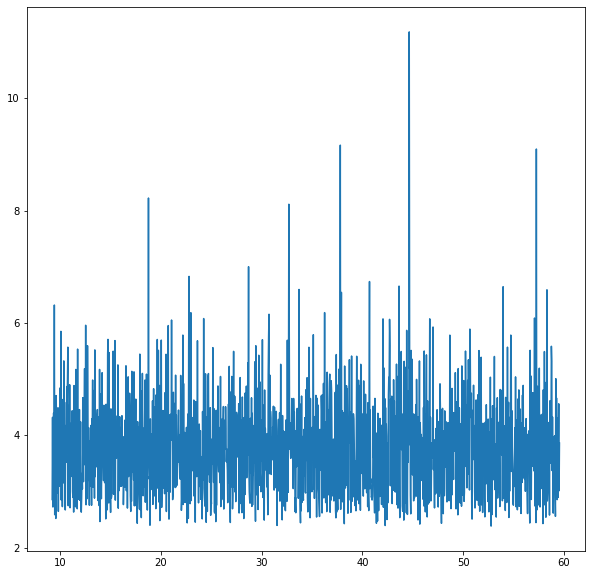

In [15]:
plt.figure(figsize=(10,10))

plt.plot(x_tsr_k_logger + controller_start_time, dps_k, label='d_{P,S}')


# Shift controller delays to correct vertical position.
# We assume a symmetrical distribution of delays. Therefore,
# we shift d_pc_k to the middle of tanrx_k and tsstx_k.

l2l2_lat = processing_latencies.copy()
app_lat = up_to_dparx_k.copy()

print('len(l2l2_lat): ' + str(len(l2l2_lat)) + ", len(app_lat): " + str(len(app_lat)))
while not (len(l2l2_lat) == len(app_lat)):
    print('len(l2l2_lat): ' + str(len(l2l2_lat)) + ", len(app_lat): " + str(len(app_lat)))
    if len(l2l2_lat) < len(app_lat):
        del app_lat[-1]
    else:
        del l2l2_lat[-1]

l2l2_latnp = np.asarray(l2l2_lat)
app_latnp = np.asarray(app_lat)

# shifted one
up_to_tssrx_k = (dps_k + (up_to_dparx_k - dps_k) / 2) - (dpc_k / 2)
plt.plot(x_tssrx_k_logger + controller_start_time, up_to_tssrx_k, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX}')

# shifted two
up_to_tastx_k = (dps_k + (up_to_dparx_k - dps_k) / 2) + (dpc_k / 2)
plt.plot(x_tssrx_k_logger + controller_start_time, up_to_tastx_k, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX} + d_{P,C}')

# shifted three
up_to_tantx_k = (dps_k + (up_to_dparx_k - dps_k) / 2) - (dpc_k / 2) + (l2l2_latnp / 2)
plt.plot(x_tssrx_k_logger + controller_start_time, up_to_tantx_k, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX} + d_{P,C} + d_{P,ATX}')

print(up_to_tssrx_k)
print(up_to_tastx_k)
print(up_to_tantx_k)

plt.plot(x_tsr_k_logger + controller_start_time, up_to_dparx_k, label='d_{overall} - d_{P,A}')
plt.plot(x_tsr_k_logger + controller_start_time, up_to_dpa_k, label='d_{overall}')

plt.legend()
plt.ylim(0)

plt.ylabel('Delay in ms')
plt.xlabel('Measurement time in s')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-delay_timeseries.tex')
print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)

NameError: name 'up_to_tssrx_k' is not defined

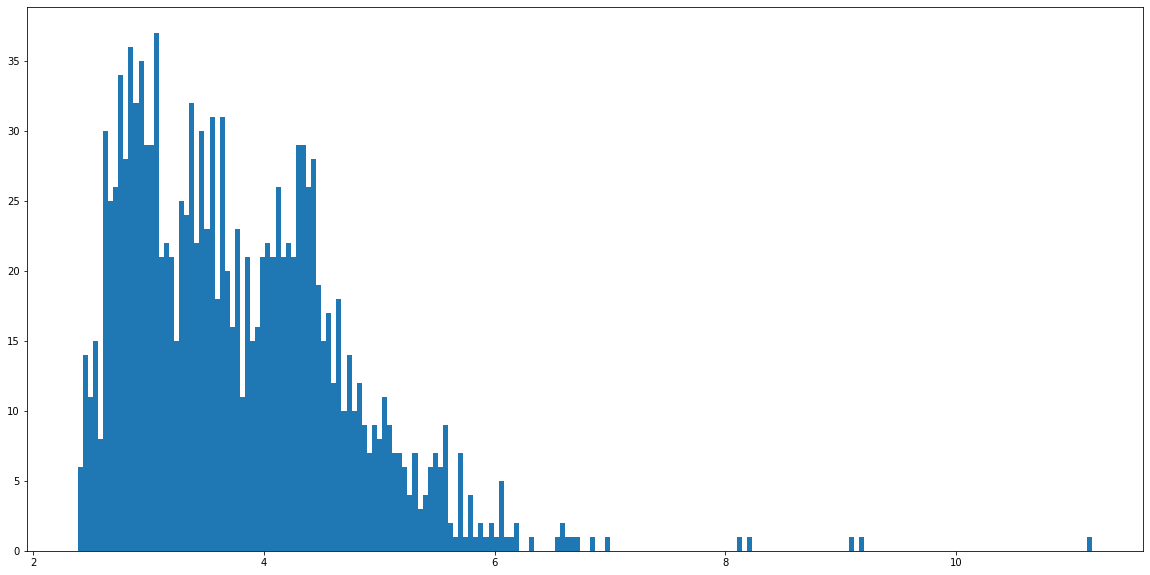

In [14]:
plt.figure(figsize=(20,10))


plt.hist(dps_k, bins=200, label='d_{P,S}')

plt.hist(up_to_tssrx_k, bins=200, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX}')
plt.hist(up_to_tastx_k, bins=200, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX} + d_{P,C}')
plt.hist(up_to_tantx_k, bins=200, label='d_{P,S} + d_{P,STX} + d_{N,S} + d_{P,SRX} + d_{P,C} + d_{P,ATX}')

plt.hist(up_to_dparx_k, bins=200, label='d_{overall} - d_{P,A}')
plt.hist(up_to_dpa_k, bins=200, label='d_{overall}')

plt.legend()

plt.ylabel('Number of events')
plt.xlabel('Delay in ms')

if SHOW:
    plt.show()

p2 = Path(plot_folder, measurement_folder.stem + '-delay-hist.tex')
#print(p2)

with codecs.open(p2, 'w', encoding='utf8') as f:
    f.write(tikz_header)
    f.write(get_tikz_code(plt.figure(1), show_info=False, figurewidth=FIGURE_WIDTH, figureheight=FIGURE_HEIGHT))
    f.write(tikz_footer)